In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('WineData.csv')

In [4]:
df.head()

,Product,Sample Number,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Wine,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Wine,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Wine,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Wine,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Wine,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
X = df.loc[:,"fixed acidity":'alcohol']

In [13]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(X)
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

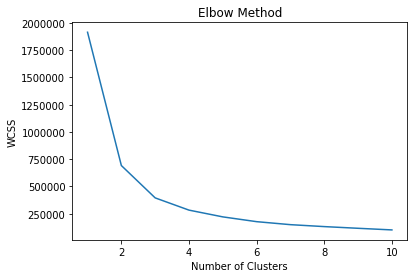

In [14]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)

pred_y = kmeans.fit_predict(X)

In [16]:
kmeans.cluster_centers_

array([[8.46982759e+00, 5.19519704e-01, 2.68608374e-01, 2.36102217e+00,
        8.46059113e-02, 8.99507389e+00, 2.23928571e+01, 9.96617512e-01,
        3.31137931e+00, 6.47216749e-01, 1.05769294e+01],
       [7.88755187e+00, 5.72365145e-01, 2.75643154e-01, 3.23236515e+00,
        8.83983402e-02, 2.61514523e+01, 1.08506224e+02, 9.96934730e-01,
        3.28962656e+00, 6.52033195e-01, 1.00089212e+01],
       [8.28699634e+00, 5.20503663e-01, 2.72435897e-01, 2.49706960e+00,
        9.13095238e-02, 2.15705128e+01, 5.48882784e+01, 9.96855769e-01,
        3.32020147e+00, 6.77106227e-01, 1.03768010e+01]])

In [26]:
# The labesl (i.e. clusters) that each observation was assigned to by the kmeans algorithm
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [28]:
len(kmeans.labels_)

1599

In [5]:
from mpl_toolkits.mplot3d import Axes3D

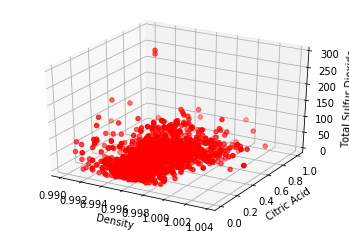

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['density']
y = df['citric acid']
z = df['total sulfur dioxide']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Density')
ax.set_ylabel('Citric Acid')
ax.set_zlabel('Total Sulfur Dioxide')

plt.savefig('threeFeatureScatter')
plt.show()

In [7]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['density','citric acid','total sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

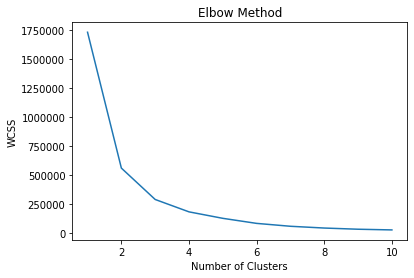

In [8]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

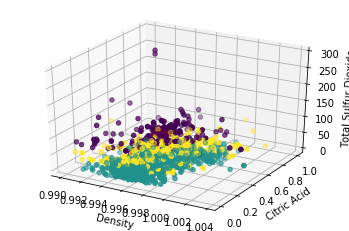

In [13]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['density','citric acid','total sulfur dioxide']])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z,c=pred_y)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s=300, c='red')

ax.set_xlabel('Density')
ax.set_ylabel('Citric Acid')
ax.set_zlabel('Total Sulfur Dioxide')

plt.savefig('threeFeatureKMeans.png')
plt.show()


In [11]:
kmeans.cluster_centers_

array([[  0.99687492,   0.27285714, 108.8487395 ],
       [  0.99658809,   0.2653151 ,  22.91082045],
       [  0.99694448,   0.27926923,  56.01538462]])

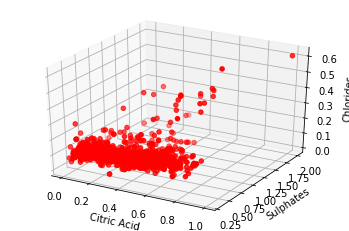

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['citric acid']
y = df['sulphates']
z = df['chlorides']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Citric Acid')
ax.set_ylabel('Sulphates')
ax.set_zlabel('Chlorides')

plt.show()

In [22]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['citric acid','sulphates','chlorides']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

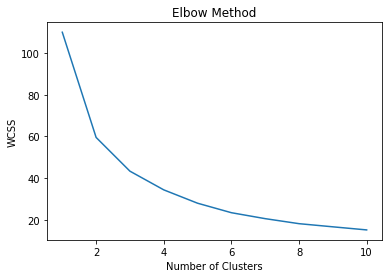

In [23]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

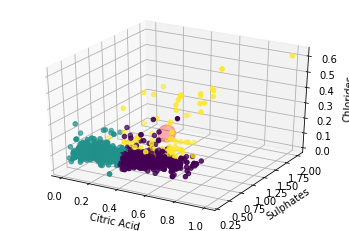

In [25]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['citric acid','sulphates','chlorides']])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z,c=pred_y)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s=300, c='red')

ax.set_xlabel('Citric Acid')
ax.set_ylabel('Sulphates')
ax.set_zlabel('Chlorides')

plt.show()

In [4]:
##### Fixed Acidity

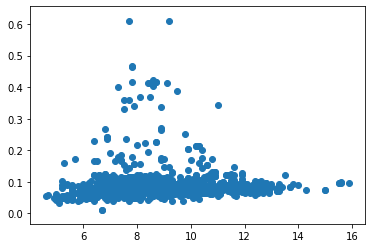

In [5]:
plt.scatter(df['fixed acidity'],df['chlorides'])

In [5]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['fixed acidity','chlorides']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

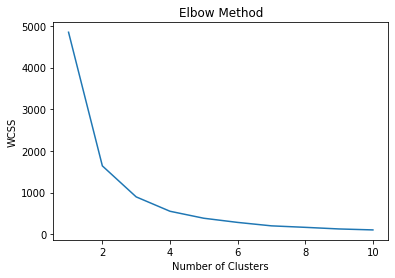

In [6]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

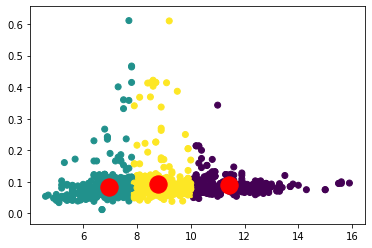

In [7]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['fixed acidity','chlorides']])
plt.scatter(df['fixed acidity'],df['chlorides'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

array([1, 1, 1, ..., 1, 1, 1])

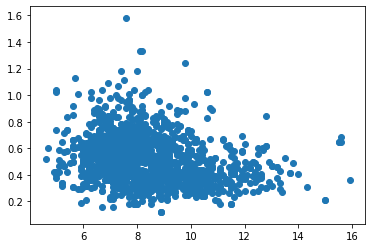

In [12]:
plt.scatter(df['fixed acidity'],df['volatile acidity'])

In [13]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []
X = np.array(df[['fixed acidity','volatile acidity']])

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['fixed acidity','volatile acidity']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

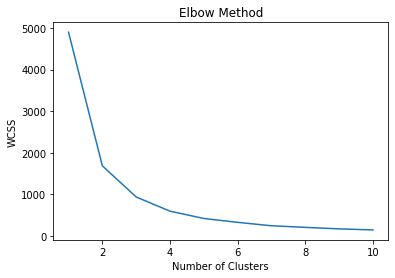

In [15]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

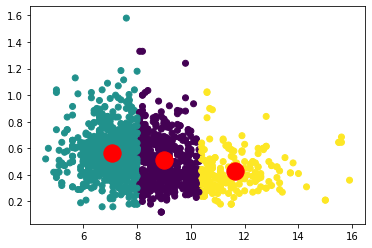

In [16]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['fixed acidity','volatile acidity']])
plt.scatter(df['fixed acidity'],df['volatile acidity'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

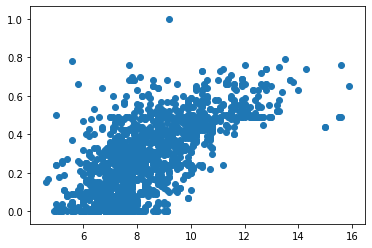

In [17]:
plt.scatter(df['fixed acidity'],df['citric acid'])

In [18]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['fixed acidity','citric acid']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

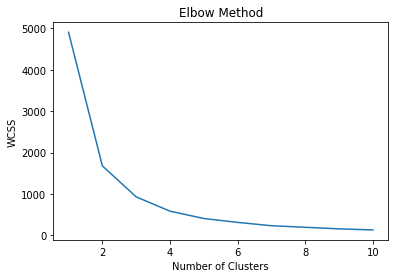

In [19]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

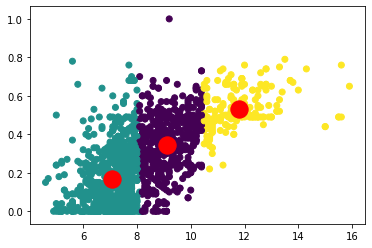

In [20]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['fixed acidity','citric acid']])
plt.scatter(df['fixed acidity'],df['citric acid'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

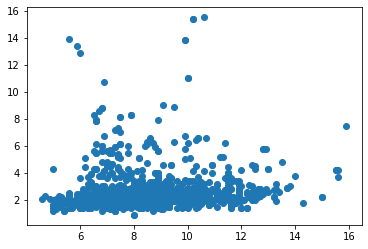

In [21]:
plt.scatter(df['fixed acidity'],df['residual sugar'])

In [22]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['fixed acidity','residual sugar']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

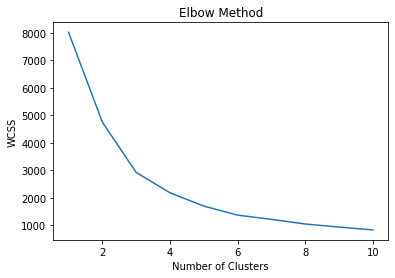

In [23]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

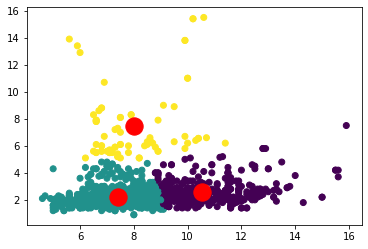

In [26]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['fixed acidity','residual sugar']])
plt.scatter(df['fixed acidity'],df['residual sugar'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

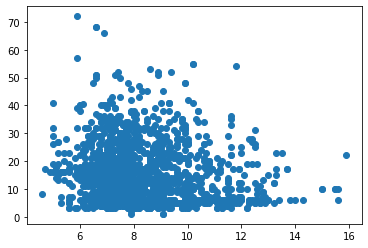

In [27]:
plt.scatter(df['fixed acidity'],df['free sulfur dioxide'])

In [28]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['fixed acidity','free sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

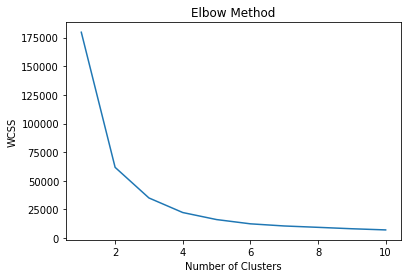

In [29]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

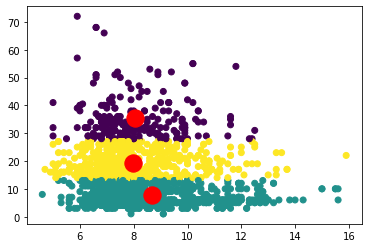

In [34]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['fixed acidity','free sulfur dioxide']])
plt.scatter(df['fixed acidity'],df['free sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

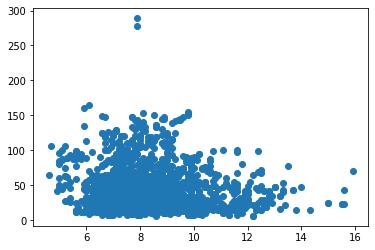

In [35]:
plt.scatter(df['fixed acidity'],df['total sulfur dioxide'])

In [36]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['fixed acidity','total sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

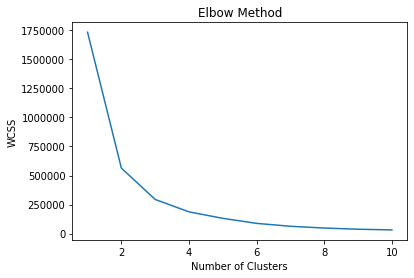

In [37]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

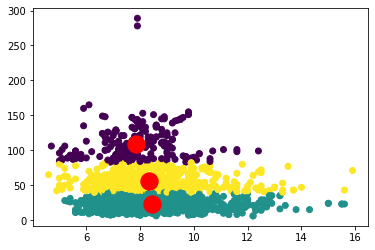

In [38]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['fixed acidity','total sulfur dioxide']])
plt.scatter(df['fixed acidity'],df['total sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

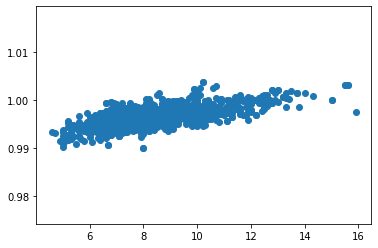

In [39]:
plt.scatter(df['fixed acidity'],df['density'])

In [40]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['fixed acidity','density']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

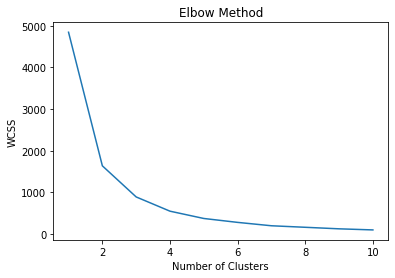

In [41]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

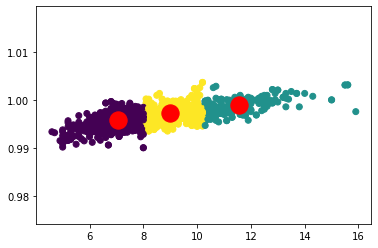

In [42]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['fixed acidity','density']])
plt.scatter(df['fixed acidity'],df['density'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

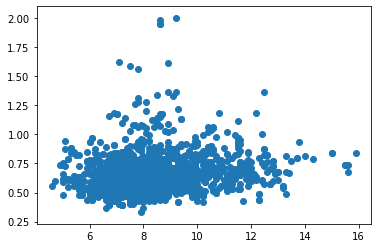

In [43]:
plt.scatter(df['fixed acidity'],df['sulphates'])

In [44]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['fixed acidity','sulphates']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

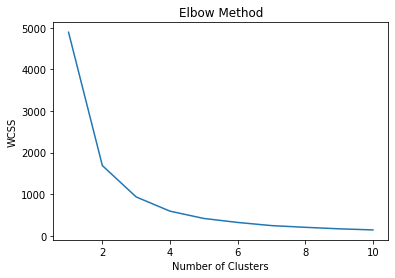

In [45]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

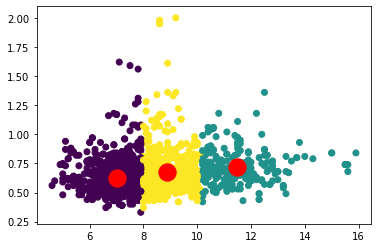

In [46]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['fixed acidity','sulphates']])
plt.scatter(df['fixed acidity'],df['sulphates'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

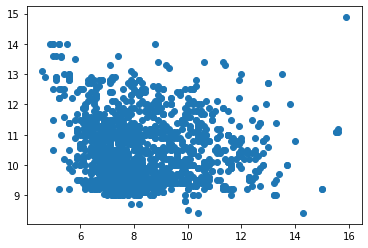

In [47]:
plt.scatter(df['fixed acidity'],df['alcohol'])

In [48]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['fixed acidity','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

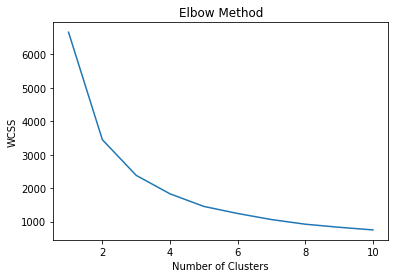

In [49]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

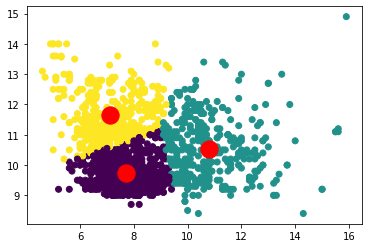

In [50]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['fixed acidity','alcohol']])
plt.scatter(df['fixed acidity'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
### Volatile Acidity

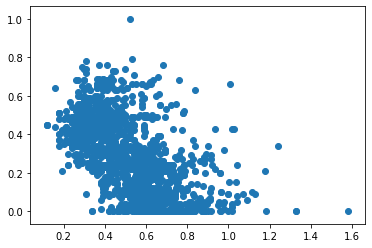

In [51]:
plt.scatter(df['volatile acidity'],df['citric acid'])

In [52]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['volatile acidity','citric acid']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

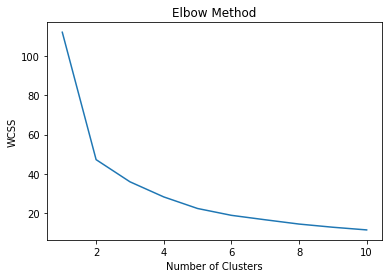

In [53]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

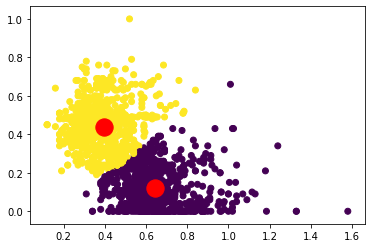

In [54]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['volatile acidity','citric acid']])
plt.scatter(df['volatile acidity'],df['citric acid'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

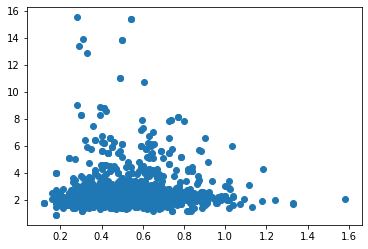

In [55]:
plt.scatter(df['volatile acidity'],df['residual sugar'])

In [56]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['volatile acidity','residual sugar']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

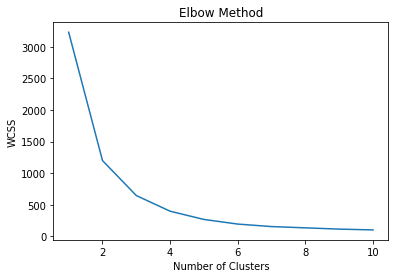

In [57]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

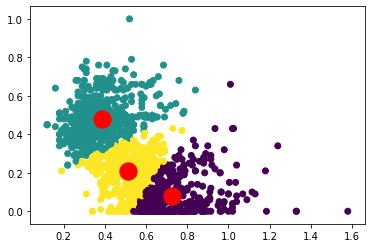

In [58]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['volatile acidity','citric acid']])
plt.scatter(df['volatile acidity'],df['citric acid'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

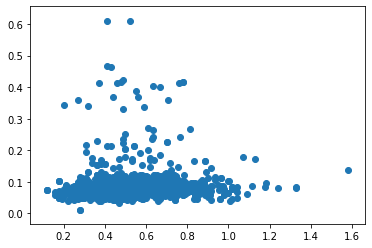

In [59]:
plt.scatter(df['volatile acidity'],df['chlorides'])

In [60]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['volatile acidity','chlorides']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

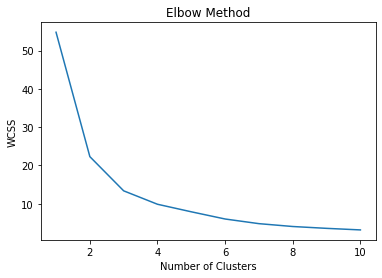

In [61]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

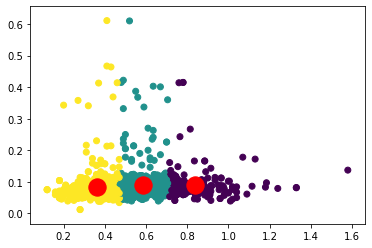

In [62]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['volatile acidity','chlorides']])
plt.scatter(df['volatile acidity'],df['chlorides'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

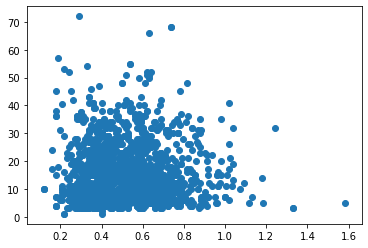

In [63]:
plt.scatter(df['volatile acidity'],df['free sulfur dioxide'])

In [64]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['volatile acidity','free sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

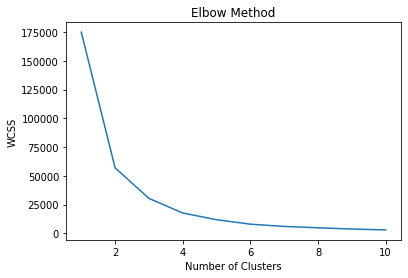

In [65]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

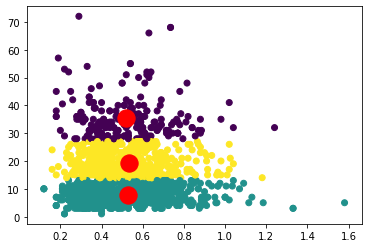

In [66]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['volatile acidity','free sulfur dioxide']])
plt.scatter(df['volatile acidity'],df['free sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

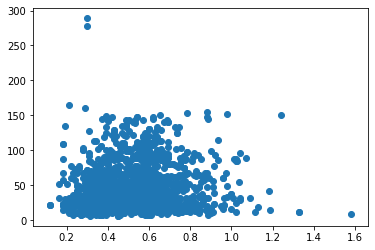

In [67]:
plt.scatter(df['volatile acidity'],df['total sulfur dioxide'])

In [68]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['volatile acidity','total sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

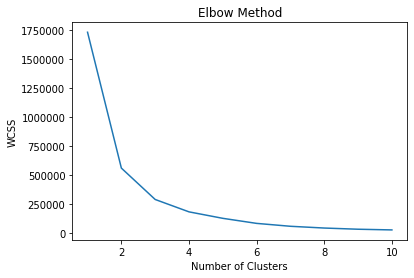

In [69]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

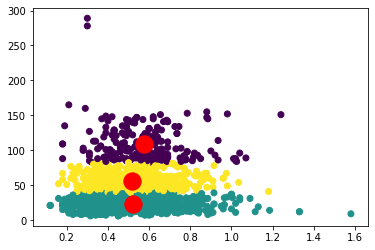

In [70]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['volatile acidity','total sulfur dioxide']])
plt.scatter(df['volatile acidity'],df['total sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

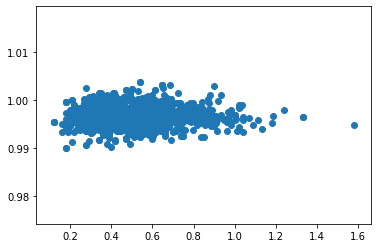

In [71]:
plt.scatter(df['volatile acidity'],df['density'])

In [72]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['volatile acidity','density']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

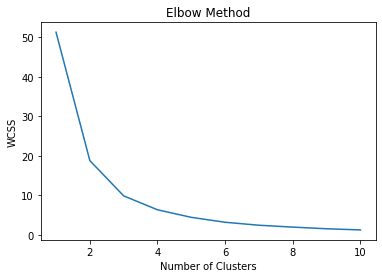

In [73]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

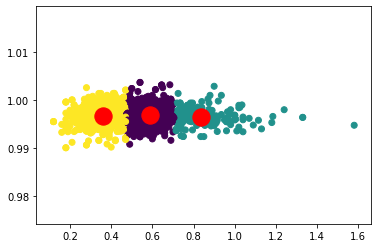

In [74]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['volatile acidity','density']])
plt.scatter(df['volatile acidity'],df['density'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

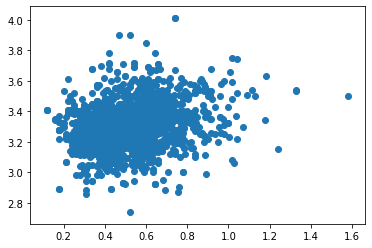

In [75]:
plt.scatter(df['volatile acidity'],df['pH'])

In [76]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['volatile acidity','pH']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

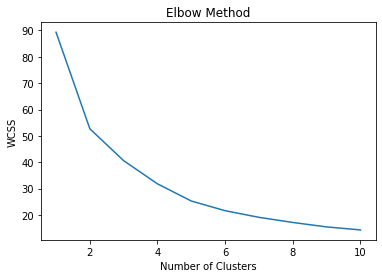

In [77]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

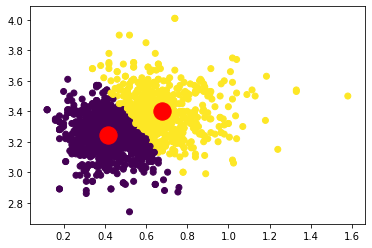

In [78]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['volatile acidity','pH']])
plt.scatter(df['volatile acidity'],df['pH'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

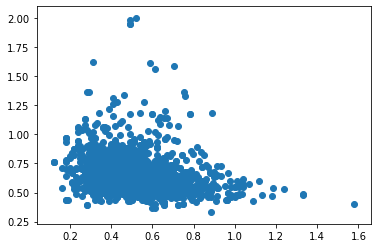

In [79]:
plt.scatter(df['volatile acidity'],df['sulphates'])

In [80]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['volatile acidity','sulphates']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

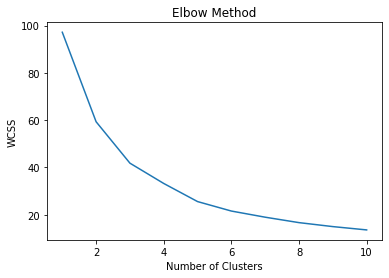

In [81]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

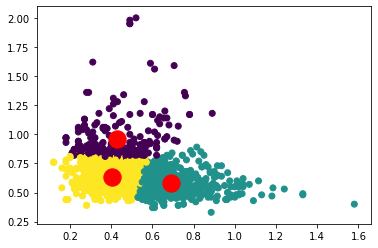

In [83]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['volatile acidity','sulphates']])
plt.scatter(df['volatile acidity'],df['sulphates'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

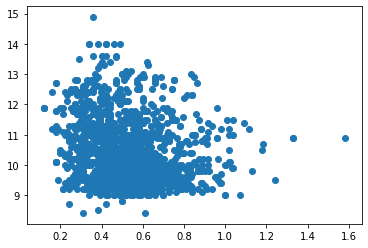

In [84]:
plt.scatter(df['volatile acidity'],df['alcohol'])

In [85]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['volatile acidity','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

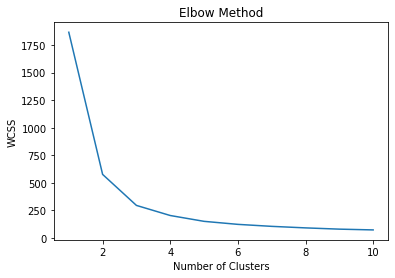

In [86]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

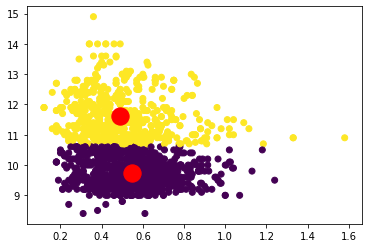

In [90]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['volatile acidity','alcohol']])
plt.scatter(df['volatile acidity'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
### Citric Acid

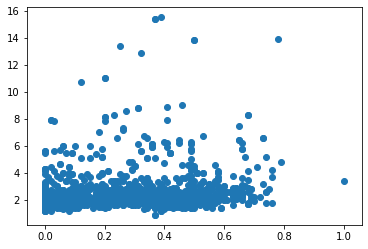

In [91]:
plt.scatter(df['citric acid'],df['residual sugar'])

In [101]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['citric acid','residual sugar']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

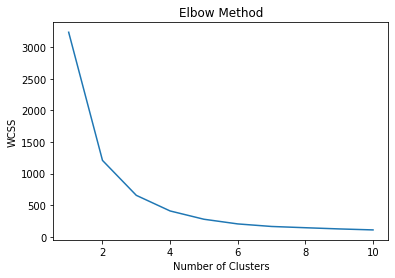

In [102]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

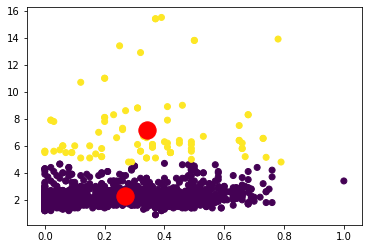

In [105]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['citric acid','residual sugar']])
plt.scatter(df['citric acid'],df['residual sugar'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

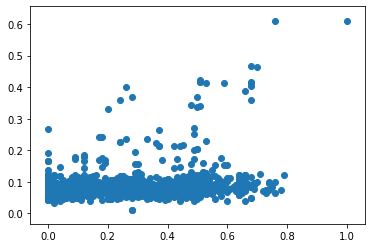

In [96]:
plt.scatter(df['citric acid'],df['chlorides'])

In [106]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['citric acid','chlorides']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

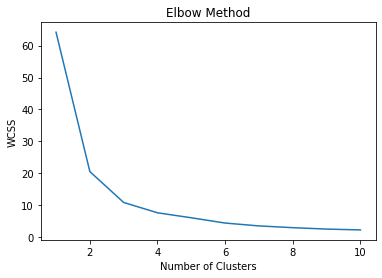

In [107]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

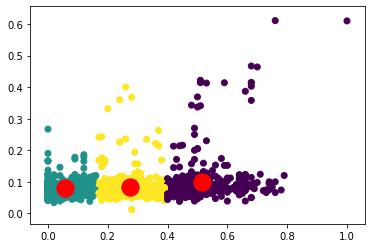

In [108]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['citric acid','chlorides']])
plt.scatter(df['citric acid'],df['chlorides'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

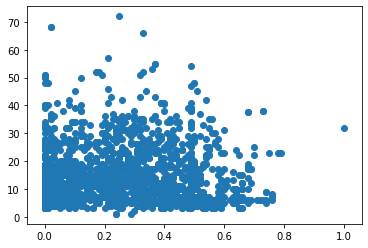

In [109]:
plt.scatter(df['citric acid'],df['free sulfur dioxide'])

In [110]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['citric acid','free sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

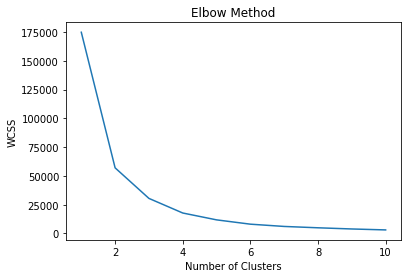

In [111]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

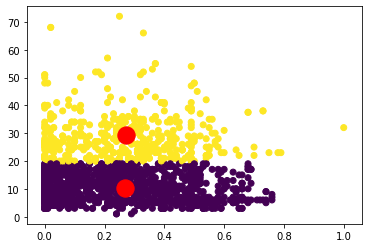

In [112]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['citric acid','free sulfur dioxide']])
plt.scatter(df['citric acid'],df['free sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

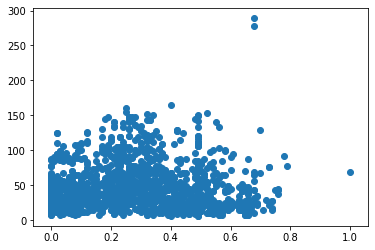

In [113]:
plt.scatter(df['citric acid'],df['total sulfur dioxide'])

In [114]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['citric acid','total sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

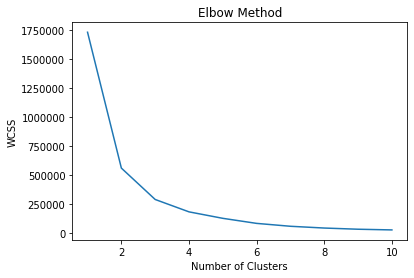

In [115]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

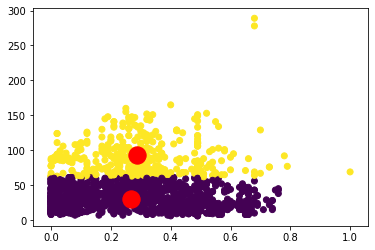

In [118]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['citric acid','total sulfur dioxide']])
plt.scatter(df['citric acid'],df['total sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

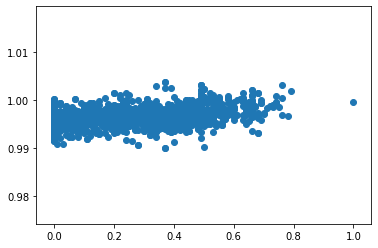

In [4]:
plt.scatter(df['citric acid'],df['density'])

In [5]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['citric acid','density']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

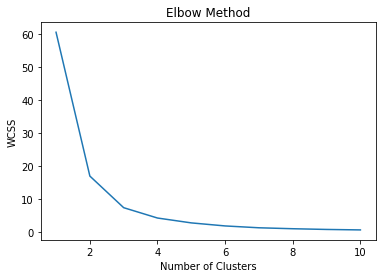

In [6]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

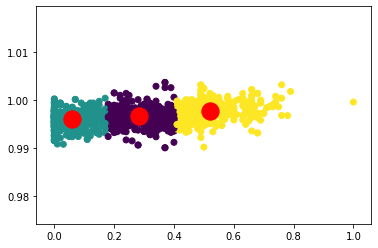

In [7]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['citric acid','density']])
plt.scatter(df['citric acid'],df['density'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

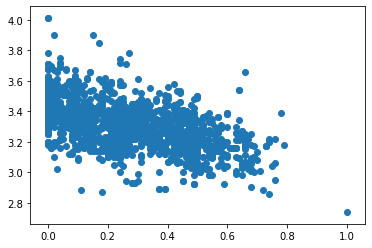

In [8]:
plt.scatter(df['citric acid'],df['pH'])

In [9]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['citric acid','pH']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

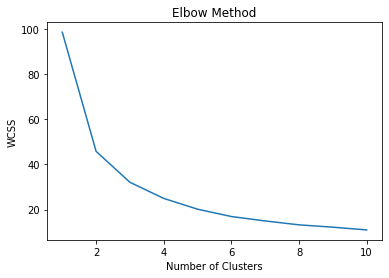

In [10]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

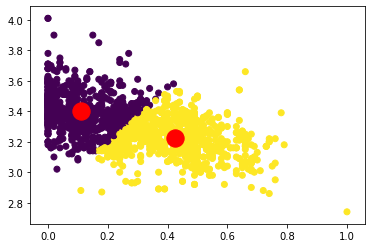

In [11]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['citric acid','pH']])
plt.scatter(df['citric acid'],df['pH'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

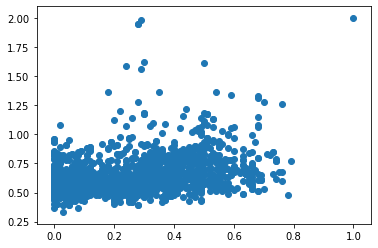

In [12]:
plt.scatter(df['citric acid'],df['sulphates'])

In [13]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['citric acid','sulphates']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

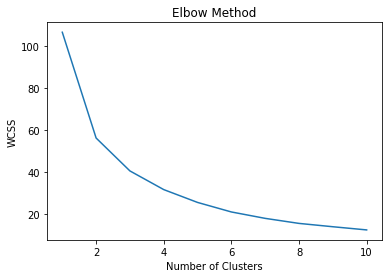

In [14]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

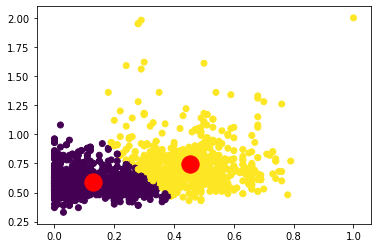

In [15]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['citric acid','sulphates']])
plt.scatter(df['citric acid'],df['sulphates'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

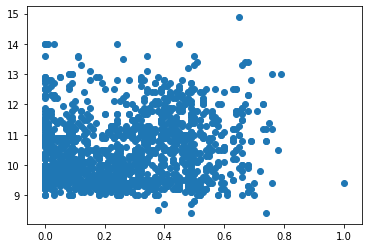

In [16]:
plt.scatter(df['citric acid'],df['alcohol'])

In [17]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['citric acid','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

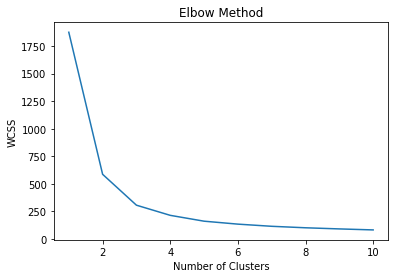

In [18]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

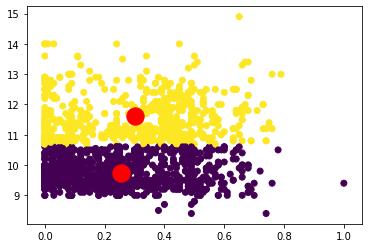

In [21]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['citric acid','alcohol']])
plt.scatter(df['citric acid'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
### Residual Sugar

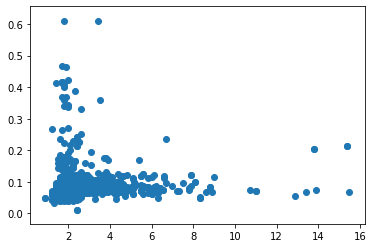

In [22]:
plt.scatter(df['residual sugar'],df['chlorides'])

In [23]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['residual sugar','chlorides']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

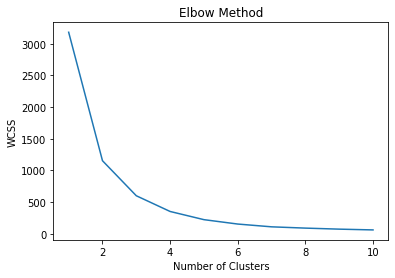

In [24]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

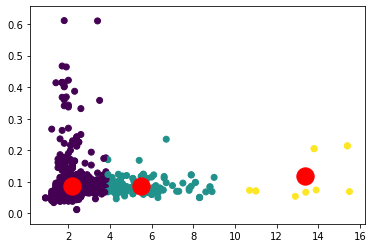

In [26]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['residual sugar','chlorides']])
plt.scatter(df['residual sugar'],df['chlorides'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

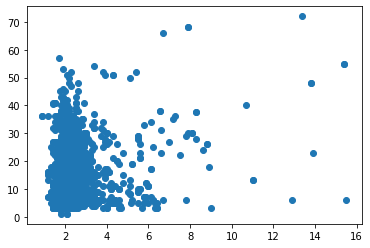

In [27]:
plt.scatter(df['residual sugar'],df['free sulfur dioxide'])

In [28]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['residual sugar','free sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

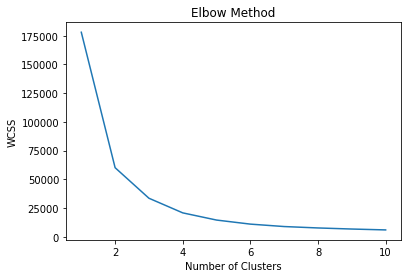

In [29]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

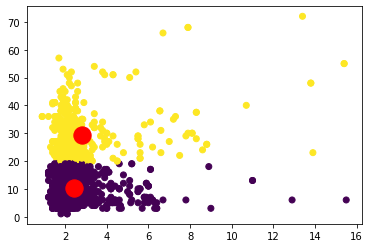

In [35]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['residual sugar','free sulfur dioxide']])
plt.scatter(df['residual sugar'],df['free sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

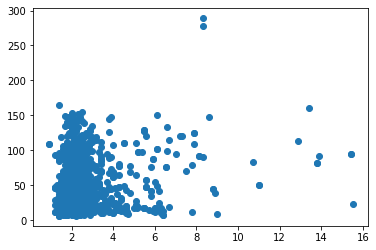

In [36]:
plt.scatter(df['residual sugar'],df['total sulfur dioxide'])

In [37]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['residual sugar','total sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

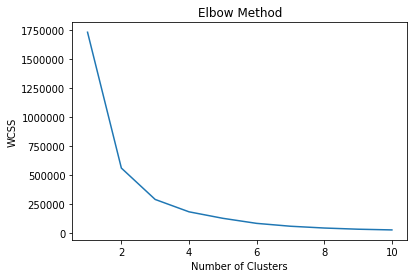

In [38]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

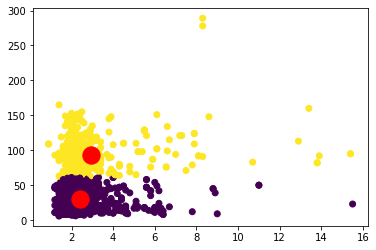

In [39]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['residual sugar','total sulfur dioxide']])
plt.scatter(df['residual sugar'],df['total sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

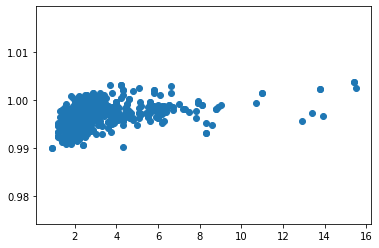

In [40]:
plt.scatter(df['residual sugar'],df['density'])

In [41]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['residual sugar','density']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

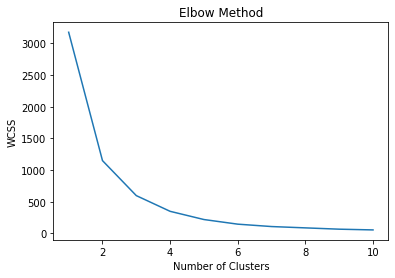

In [42]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

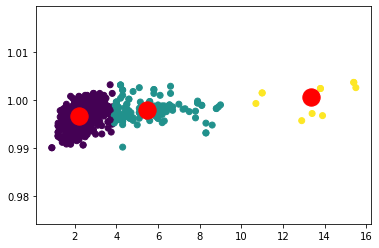

In [44]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['residual sugar','density']])
plt.scatter(df['residual sugar'],df['density'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

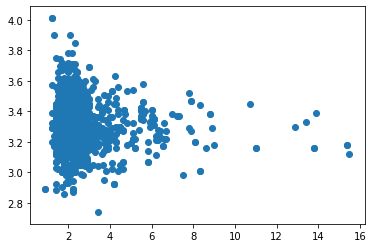

In [45]:
plt.scatter(df['residual sugar'],df['pH'])

In [46]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['residual sugar','pH']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

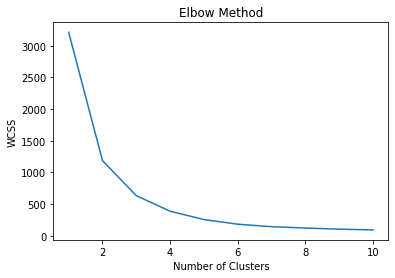

In [47]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

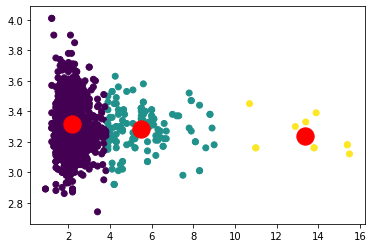

In [49]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['residual sugar','pH']])
plt.scatter(df['residual sugar'],df['pH'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

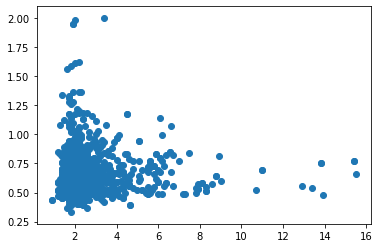

In [50]:
plt.scatter(df['residual sugar'],df['sulphates'])

In [51]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['residual sugar','sulphates']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

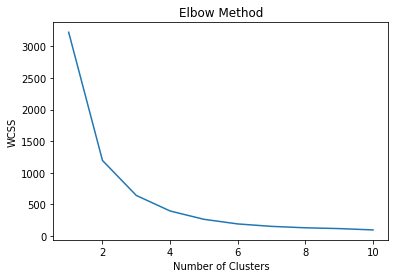

In [52]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

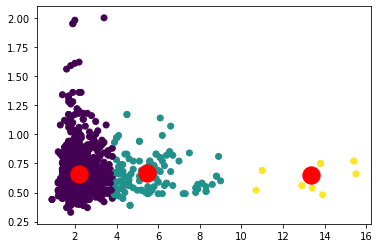

In [54]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['residual sugar','sulphates']])
plt.scatter(df['residual sugar'],df['sulphates'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

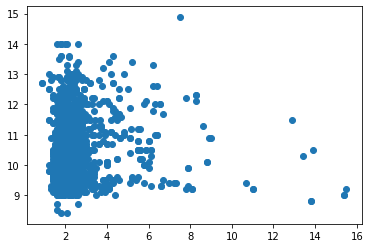

In [55]:
plt.scatter(df['residual sugar'],df['alcohol'])

In [56]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['residual sugar','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

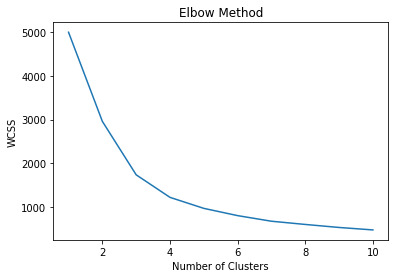

In [57]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

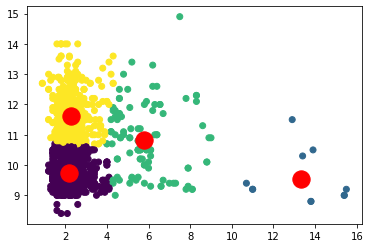

In [60]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['residual sugar','alcohol']])
plt.scatter(df['residual sugar'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
### Chlorides

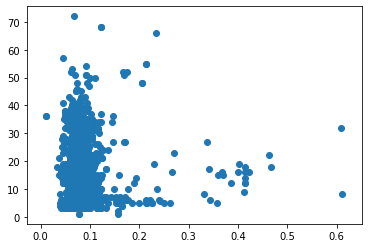

In [61]:
plt.scatter(df['chlorides'],df['free sulfur dioxide'])

In [62]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['chlorides','free sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

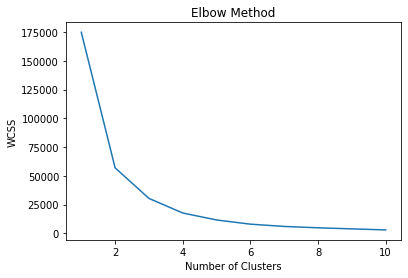

In [63]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

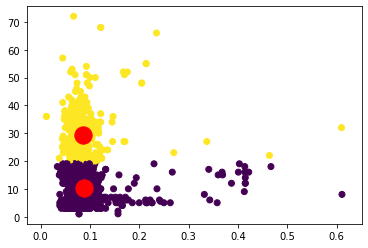

In [66]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['chlorides','free sulfur dioxide']])
plt.scatter(df['chlorides'],df['free sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

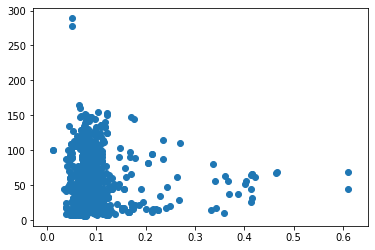

In [67]:
plt.scatter(df['chlorides'],df['total sulfur dioxide'])

In [68]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['chlorides','total sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

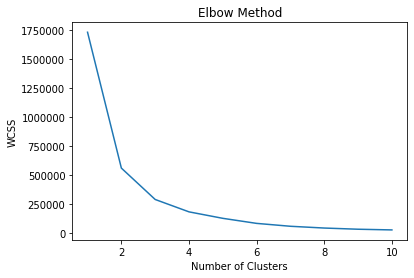

In [69]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

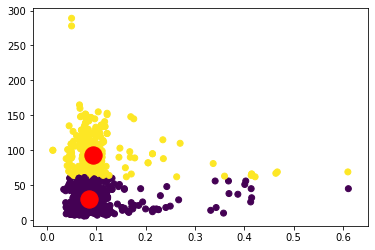

In [72]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['chlorides','total sulfur dioxide']])
plt.scatter(df['chlorides'],df['total sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

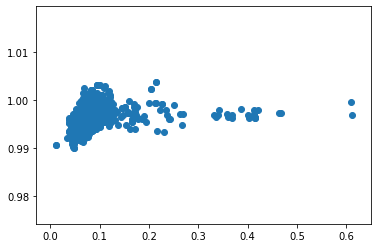

In [73]:
plt.scatter(df['chlorides'],df['density'])

In [74]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['chlorides','density']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

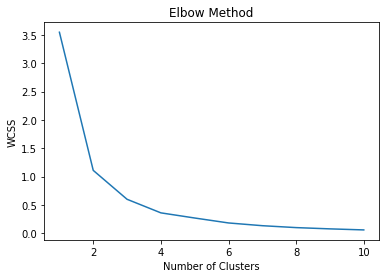

In [75]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

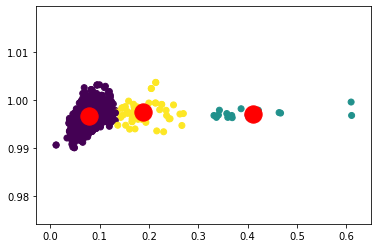

In [77]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['chlorides','density']])
plt.scatter(df['chlorides'],df['density'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

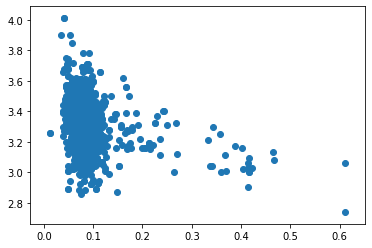

In [78]:
plt.scatter(df['chlorides'],df['pH'])

In [79]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['chlorides','pH']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

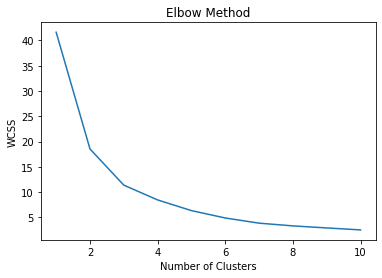

In [80]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

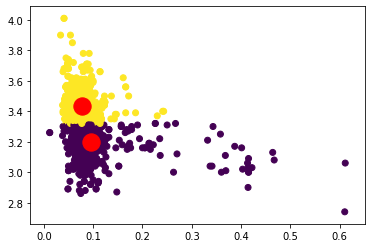

In [84]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['chlorides','pH']])
plt.scatter(df['chlorides'],df['pH'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

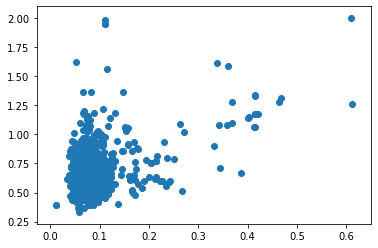

In [86]:
plt.scatter(df['chlorides'],df['sulphates'])

In [87]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['chlorides','sulphates']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

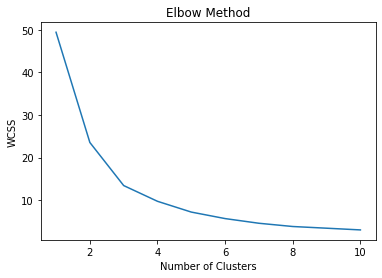

In [88]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

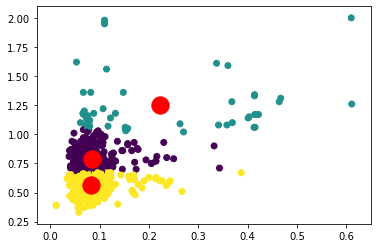

In [90]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['chlorides','sulphates']])
plt.scatter(df['chlorides'],df['sulphates'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

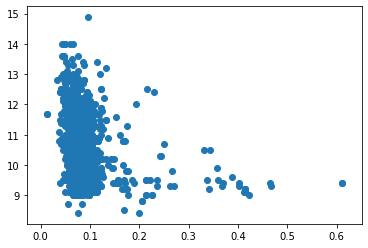

In [91]:
plt.scatter(df['chlorides'],df['alcohol'])

In [92]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['chlorides','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

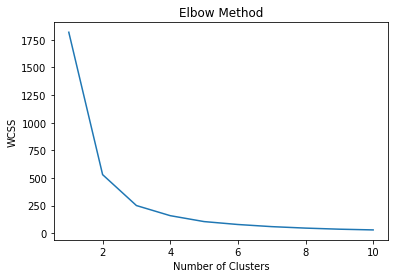

In [93]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

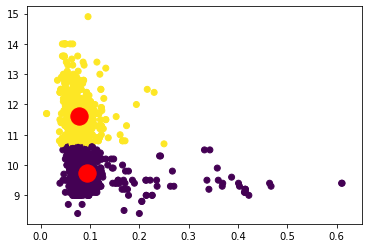

In [96]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['chlorides','alcohol']])
plt.scatter(df['chlorides'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
### Free Sulfur dioxoide

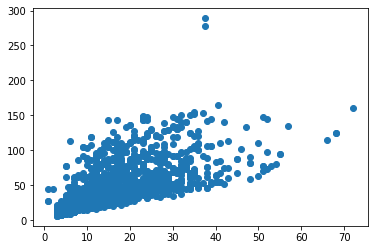

In [4]:
plt.scatter(df['free sulfur dioxide'],df['total sulfur dioxide'])

In [5]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['free sulfur dioxide','total sulfur dioxide']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

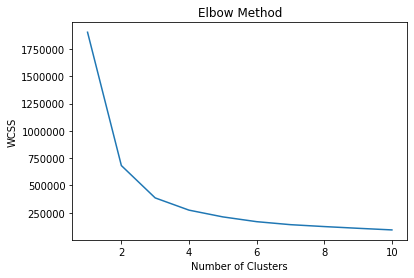

In [6]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

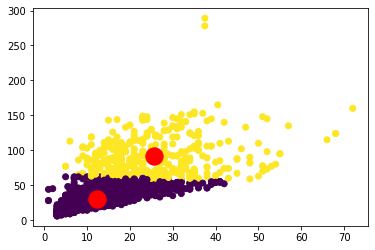

In [7]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['free sulfur dioxide','total sulfur dioxide']])
plt.scatter(df['free sulfur dioxide'],df['total sulfur dioxide'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

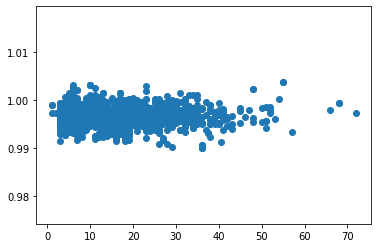

In [8]:
plt.scatter(df['free sulfur dioxide'],df['density'])

In [9]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['free sulfur dioxide','density']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

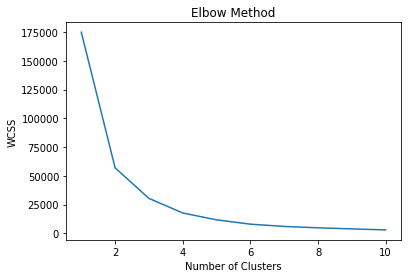

In [10]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

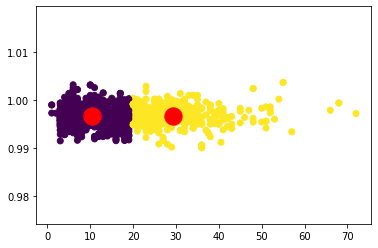

In [13]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['free sulfur dioxide','density']])
plt.scatter(df['free sulfur dioxide'],df['density'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

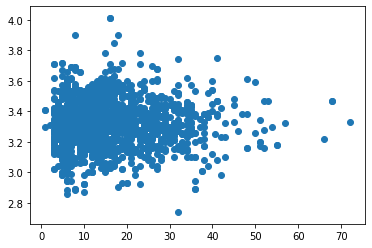

In [14]:
plt.scatter(df['free sulfur dioxide'],df['pH'])

In [15]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['free sulfur dioxide','pH']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

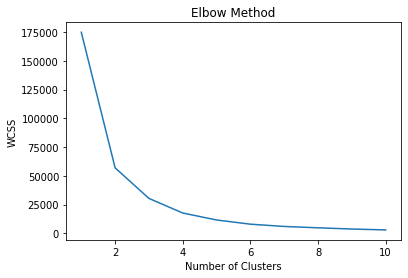

In [16]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

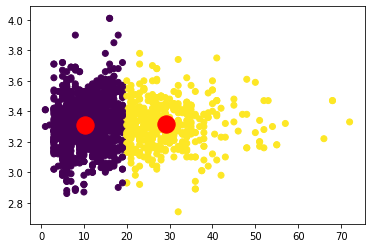

In [17]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['free sulfur dioxide','pH']])
plt.scatter(df['free sulfur dioxide'],df['pH'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

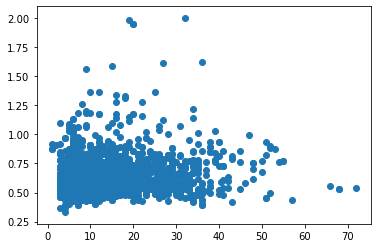

In [18]:
plt.scatter(df['free sulfur dioxide'],df['sulphates'])

In [19]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['free sulfur dioxide','sulphates']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

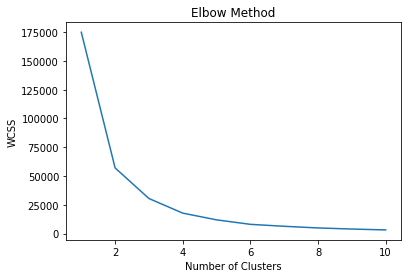

In [20]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

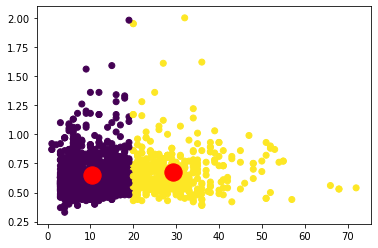

In [21]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['free sulfur dioxide','sulphates']])
plt.scatter(df['free sulfur dioxide'],df['sulphates'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

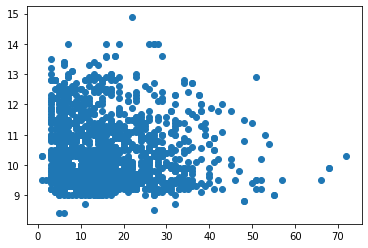

In [22]:
plt.scatter(df['free sulfur dioxide'],df['alcohol'])

In [23]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['free sulfur dioxide','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

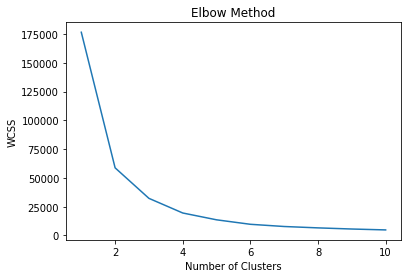

In [24]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

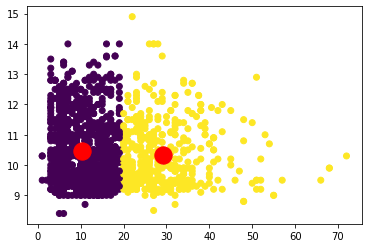

In [25]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['free sulfur dioxide','alcohol']])
plt.scatter(df['free sulfur dioxide'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
### Total Sulfur Dioxide

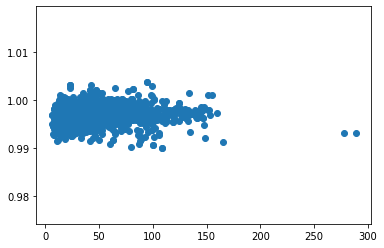

In [26]:
plt.scatter(df['total sulfur dioxide'],df['density'])

In [27]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['total sulfur dioxide','density']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

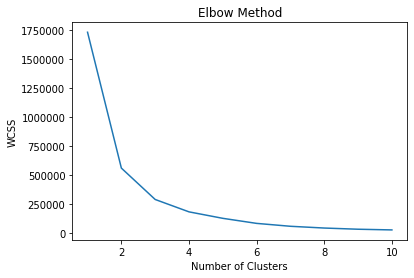

In [28]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

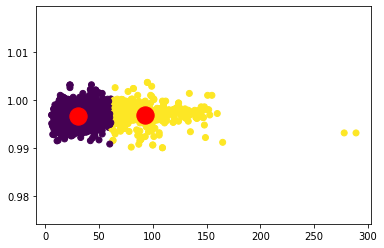

In [31]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['total sulfur dioxide','density']])
plt.scatter(df['total sulfur dioxide'],df['density'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

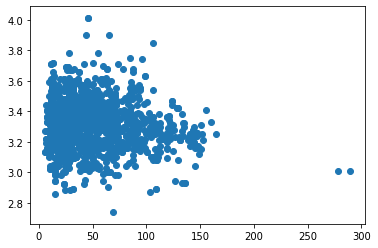

In [32]:
plt.scatter(df['total sulfur dioxide'],df['pH'])

In [33]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['total sulfur dioxide','pH']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

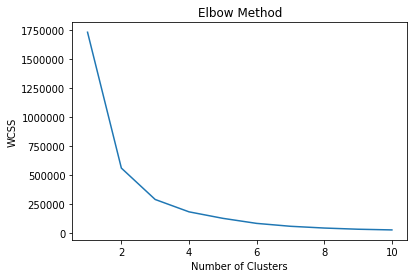

In [34]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

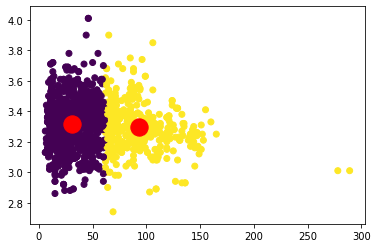

In [35]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['total sulfur dioxide','pH']])
plt.scatter(df['total sulfur dioxide'],df['pH'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

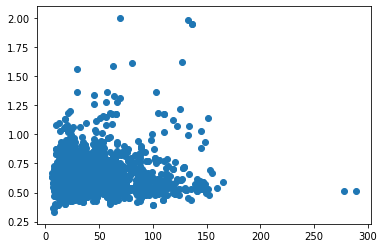

In [36]:
plt.scatter(df['total sulfur dioxide'],df['sulphates'])

In [37]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['total sulfur dioxide','sulphates']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

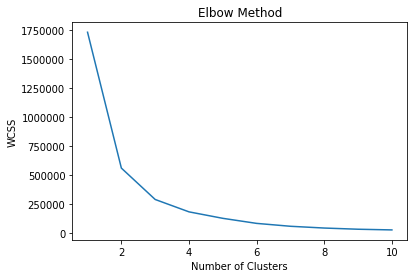

In [38]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

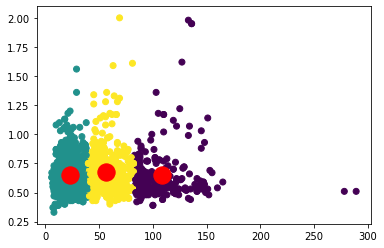

In [40]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['total sulfur dioxide','sulphates']])
plt.scatter(df['total sulfur dioxide'],df['sulphates'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

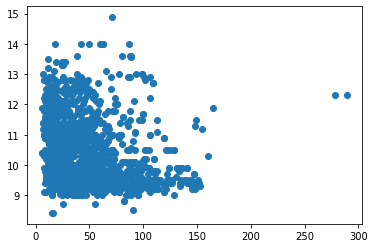

In [41]:
plt.scatter(df['total sulfur dioxide'],df['alcohol'])

In [42]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['total sulfur dioxide','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

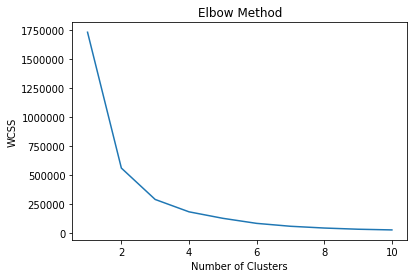

In [43]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

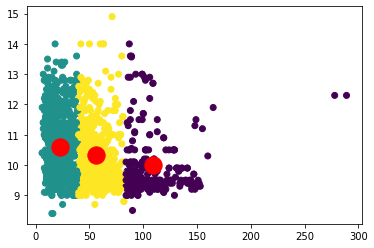

In [45]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['total sulfur dioxide','alcohol']])
plt.scatter(df['total sulfur dioxide'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
### Density

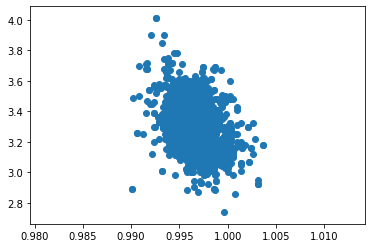

In [47]:
plt.scatter(df['density'],df['pH'])

In [48]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['density','pH']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

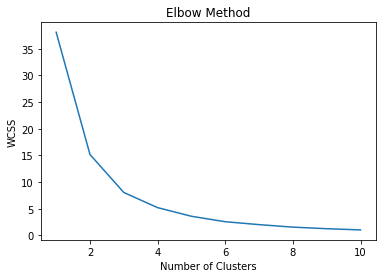

In [49]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

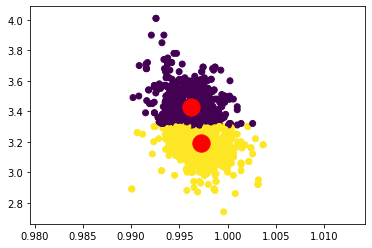

In [50]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['density','pH']])
plt.scatter(df['density'],df['pH'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

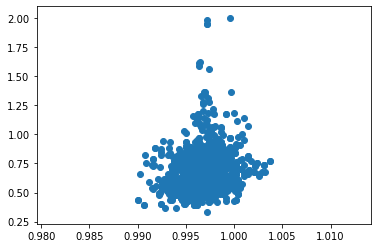

In [51]:
plt.scatter(df['density'],df['sulphates'])

In [52]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['density','sulphates']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

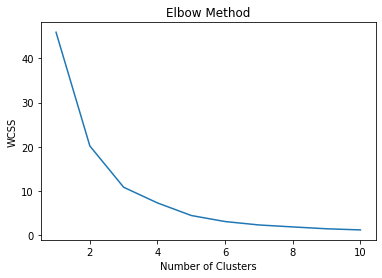

In [53]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

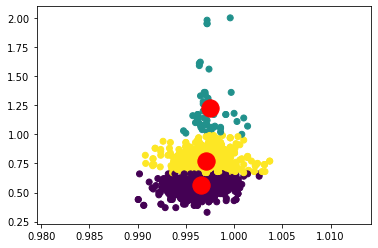

In [55]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['density','sulphates']])
plt.scatter(df['density'],df['sulphates'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

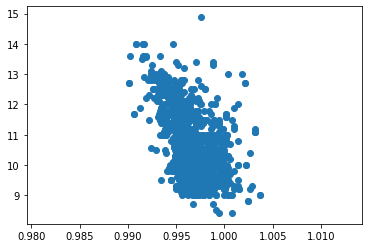

In [56]:
plt.scatter(df['density'],df['alcohol'])

In [57]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['density','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

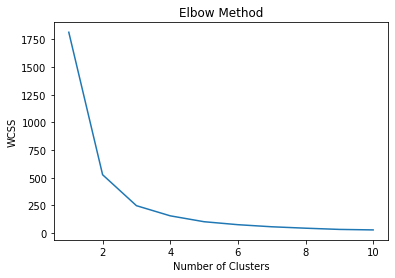

In [58]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

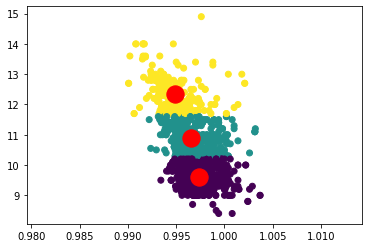

In [60]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['density','alcohol']])
plt.scatter(df['density'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
### pH

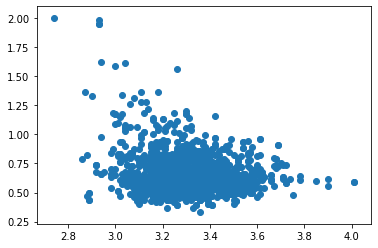

In [61]:
plt.scatter(df['pH'],df['sulphates'])

In [62]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['pH','sulphates']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

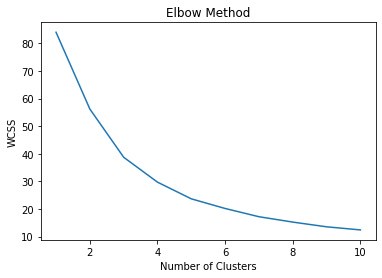

In [63]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

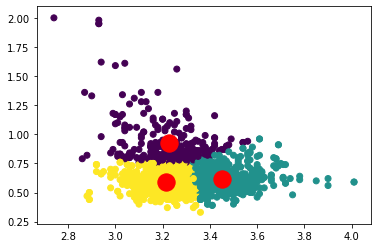

In [64]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['pH','sulphates']])
plt.scatter(df['pH'],df['sulphates'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

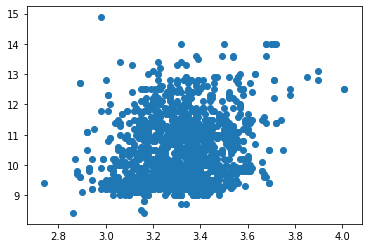

In [65]:
plt.scatter(df['pH'],df['alcohol'])

In [66]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['pH','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

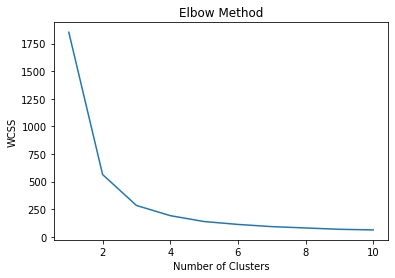

In [67]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

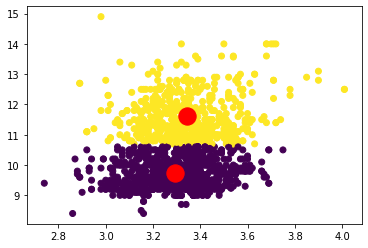

In [69]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['pH','alcohol']])
plt.scatter(df['pH'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
### Sulphates

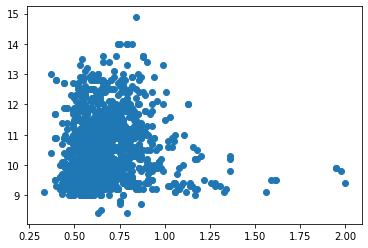

In [70]:
plt.scatter(df['sulphates'],df['alcohol'])

In [71]:
# Create empty vector to hold our Within Cluster Sum of Squares (WCSS)
wcss = []

# Fit our KMeans model for a range of different clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0,max_iter=100)
    kmeans.fit(df[['sulphates','alcohol']])
    # Append the WCSS for the corresponding cluster to our list
    wcss.append(kmeans.inertia_)

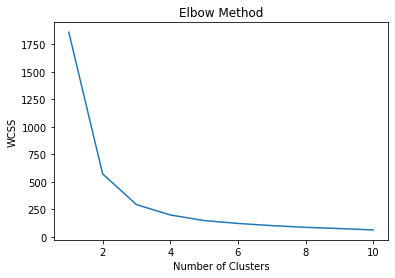

In [72]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

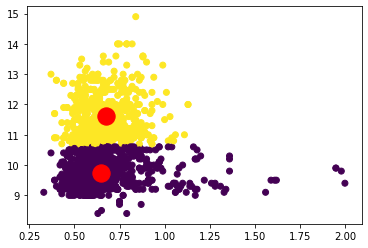

In [75]:
# Categorize the data using the optimum number of clusters found using the "Elbow" Method in the above data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
# Plot the results with the clusters
pred_y = kmeans.fit_predict(df[['sulphates','alcohol']])
plt.scatter(df['sulphates'],df['alcohol'],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()